In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

1 - Lendo os dados de índice de preços ao consumidor - Fonte: Banco Mundial

In [7]:
icp = pd.read_excel("../dados/icp.xls",skiprows=3)

Seelecionando os países do exercício 1 - EUA, Canadá, Japão, França, Alemanha, Itália e Reino Unido

In [85]:
def inflacao(pais):
    x = icp[icp['Country Name']==pais].iloc[:,24:].T
    x.columns = [pais]
    x.index = x.index.astype(float)
    return x

In [86]:
eua = inflacao('United States')
canada = inflacao('Canada')
japao = inflacao('Japan')
franca = inflacao('France')
alemanha = inflacao('Germany')
italia = inflacao('Italy')

In [136]:
eua

,United States
1980.0,37.792366
1981.0,41.698100
1982.0,44.254788
1983.0,45.676445
1984.0,47.640776
1985.0,49.329949
1986.0,50.266255
1987.0,52.108294
1988.0,54.233135
1989.0,56.850970


a) Determine a taxa de inflação de cada país

In [130]:
def calculo(x,):
    regr = LinearRegression()
    regr.fit(np.array(x.index).reshape(42,1), x.values)
    pais = x.columns[0]
    a = regr.coef_[0][0]
    return "Inflação do {} é de {:.2f}% ao ano".format(pais,a)

In [134]:
print(calculo(eua))
print(calculo(japao))
print(calculo(canada))
print(calculo(franca))
print(calculo(alemanha))
print(calculo(italia))

Inflação dos United States é de 2.02% ao ano
Inflação dos Japan é de 0.49% ao ano
Inflação dos Canada é de 1.84% ao ano
Inflação dos France é de 1.57% ao ano
Inflação dos Germany é de 1.51% ao ano
Inflação dos Italy é de 2.17% ao ano


b) Plote a curva de IPC pelo tempo

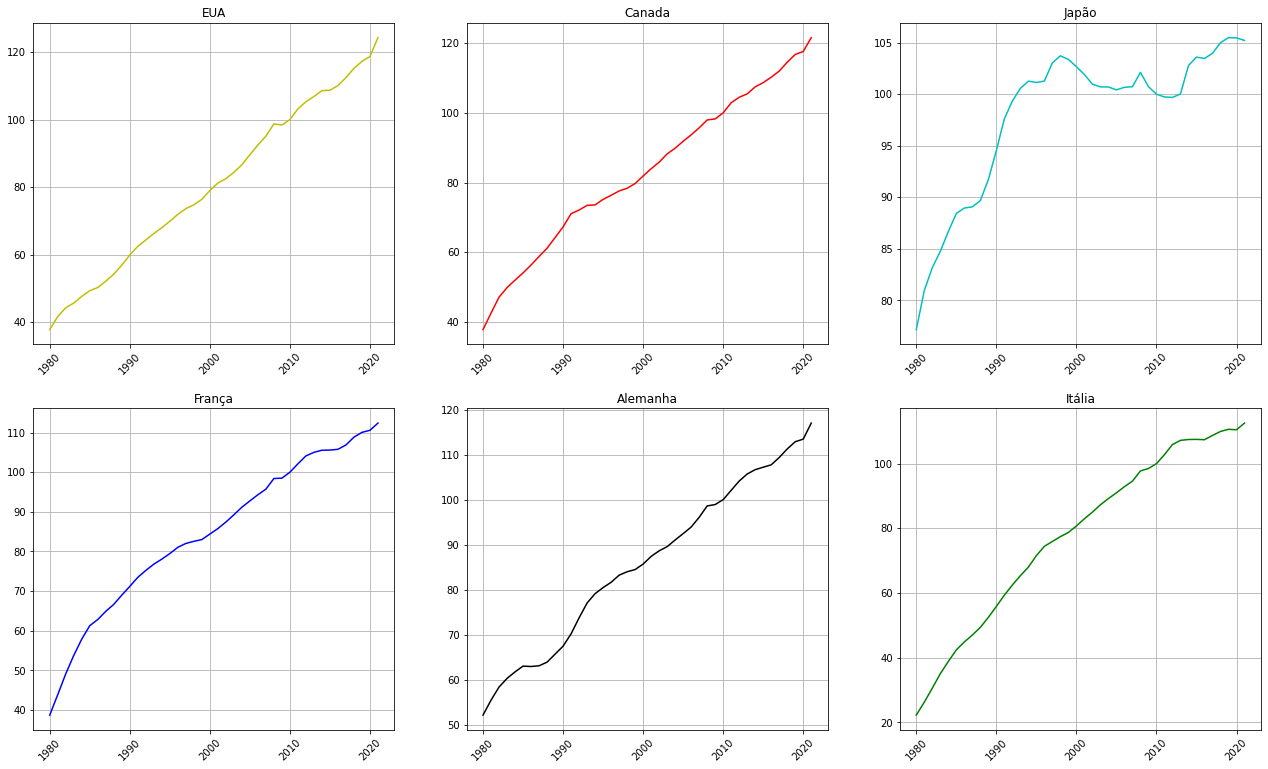

In [135]:
plt.figure(figsize=(22,13))
plt.subplot(2, 3, 1)
plt.xticks(rotation=45)
plt.title('EUA')
plt.plot(eua,'y')
plt.grid(True)
plt.subplot(2, 3, 2)
plt.xticks(rotation=45)
plt.title('Canada')
plt.plot(canada,'r')
plt.grid(True)
plt.subplot(2, 3, 3)
plt.title('Japão')
plt.xticks(rotation=45)
plt.plot(japao,'c')
plt.grid(True)
plt.subplot(2, 3, 4)
plt.xticks(rotation=45)
plt.title('França')
plt.plot(franca,'b')
plt.grid(True)
plt.subplot(2, 3, 5)
plt.xticks(rotation=45)
plt.title('Alemanha')
plt.plot(alemanha,'k')
plt.grid(True)
plt.subplot(2, 3, 6)
plt.xticks(rotation=45)
plt.title('Itália')
plt.plot(italia,'g')
plt.grid(True)
plt.show()

c) Qual conclusão podemos tirar sobre a inflação de cada país?

R: É uma evolução constante e similar nos países do G7, similar a uma reta. A exceção é o Japão, que teve uma rápida subida na década de 80 e depois uma estabilizada até hoje.